## Backpropagation


**Problem-1:**. In this problem, you will write code to perform backpropagation from scratch. Consider a network with 2 inputs, 1 hidden layer containing 3 units, and a single categorical output.

Imagine the two input nodes are labeled $x_1$ and $x_2$, the three hidden nodes are $a_1$, $a_2$, and $a_3$, and the output node is $\hat{y}$. The edges from the input layer to the hidden layer are labeled $w_{ij}$ for going from input $x_i$ to hidden node $a_j$, and the edges from the hidden layer to the output layer are $v_j$, from hidden unit $a_j$ to $\hat{y}$. There is a bias vector for the hidden layer $\mathbf{b}$ and a bias constant $c$ for the output layer.

Let $a_j = \max(0, z_j)$, where $z_j$ is a weighted sum from the previous layer plus a bias unit. That is,
$$
z_1 = w_{11}x_1 + w_{21}x_2 + b_1 \\
z_2 = w_{12}x_1 + w_{22}x_2 + b_2 \\
z_3 = w_{13}x_1 + w_{23}x_2 + b_3 \\
\Rightarrow z_j = w_{1j}x_1 + w_{2j}x_2 + b_j
$$

For the output, we write

$$ \hat{y} = g(v_1a_1 + v_2a_2 + v_3a_3 + c), $$
where $g$ is the output function (in this case, for binary classification, $g$ is the sigmoid function). Expanding the above expression to show $\hat{y}$ as a function of all of the variables of the graph, we obtain
$$ \hat{y} = g\big[v_1\max(0, w_{11}x_1 + w_{21}x_2 + b_1) \\ + v_2\max(0, w_{12}x_1 + w_{22}x_2 + b_2) \\ + v_3\max(0, w_{13}x_1 + w_{23}x_2 + b_3) + c\large].$$

We can express this succinctly using matrix notation. If

$$ W = \begin{bmatrix}
w_{11} &w_{12} &w_{13}\\
w_{21} &w_{22} &w_{23}\\
\end{bmatrix}, \hspace{.5cm} \mathbf{x} = \begin{bmatrix} x_1 \\x_2 \end{bmatrix}, \hspace{.5cm} \mathbf{b} = \begin{bmatrix} b_1 \\b_2 \\b_3\end{bmatrix}, \hspace{.5cm} \mathbf{a} = \begin{bmatrix} a_1 \\a_2 \\a_3\end{bmatrix}, \hspace{.5cm} \text{and} \hspace{.5cm} \mathbf{v} = \begin{bmatrix} v_1 \\v_2 \\v_3\end{bmatrix},$$

then
$$
z_j = W^{\text{T}}\mathbf{x} + \mathbf{b}, \hspace{.5cm} a_j = \max(0, z_j), \hspace{.5cm} \text{and} \hspace{.5cm} \hat{y} = g(\mathbf{v}^{\text{T}}\cdot\mathbf{a} + c).
$$

(A) Derive expressions of the gradient of the loss function with respect to each of the model parameters.

(B) Write a function `grad_f(...)` that takes in a weights vector and returns the gradient of the loss at that location. You will also need to write a number of helper functions.

(C) Generate a synthetic dataset resembling an XOR pattern. This has been done for you.

(D) Fit the network with gradient descent. Keep track of the total loss at each iteration. Create a plot of the loss over training iterations.

(E) Repeat (D) but using momentum. Compare and contrast the results.

(F) Plot a visualization of the final decision boundary, and overlay the decision boundary over the XOR dataset you created in (C).

`Below we provide some starter code to get you started`

In [1]:
import numpy as np

**YOUR ANSWER FOR (A) HERE**:


In [2]:
#define sigmoid activation 
def sig(x):
    return 1.0 / (1.0+ np.exp(-np.clip(x, -500, 500)))

#define relu activation
def relu(z):
    return np.maximum(0, z)

#determine the derivative of relu function, either 1 or 0
def relu_derivative(z):
    return (z > 0).astype(int)

#now we can create a function to compute the gradiant of L with respect to W and b using model parameters defined in problem 1
def get_grad(x, y, W, b, v, c):
    #forward pass
    z = np.dot(W.T, x) + b #get weighted sum in hidden layer
    a = relu(z) #use relu function created earlier
    y_hat = sig(np.dot(v.T, a) + c) #get the output of the model

    #backward pass
    dL_dyhat = -y / y_hat + (1 - y) / (1 - y_hat) #find the derivative of L with respect to y_hat

    dyhat_dv = a #y_hat is linear combination of a's, so derivative is just a
    dyhat_dc = 1 #y_hat is linear combination of 1's, so derivative is just 1

    #get gradients of L for v and c
    dL_dv = dL_dyhat * dyhat_dv #chain rule to find derivative of L with respect to v
    dL_dc = dL_dyhat * dyhat_dc #chain rule to find derivative of L with respect to c

    #compute gradient of L with respect to a (activations of hidden layer)
    dL_da = np.dot(v, dL_dyhat) #use chain rule to find derivative of L with respect to a
    dL_dz = dL_da *relu_derivative(z)  #use the derivative of relu function created earlier

    #compute gradients of L with respect to W and b using chain rule
    dL_dW = np.dot(x, dL_dz.T) #make sure dimensions match
    dL_db = dL_dz

    return dL_dW, dL_db, dL_dv, dL_dc

# Code for (B) here

In [3]:
#define sigmoid, relu and their derivatives
sigmoid = lambda x: 1.0 / (1.0 + np.exp(-np.clip(x, -500, 500)))
relu = lambda z: np.maximum(0, z)
sigmoid_prime = lambda x: sigmoid(x) * (1 - sigmoid(x))
relu_prime = lambda z: (z > 0).astype(int)

#define loss function and its derivative
def loss(y, y_hat):
    epsilon = 1e-10  #add small value to prevent log(0)
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)  #clip y_hat to prevent log(0)
    #compute binary cross-entropy loss
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

def loss_derivative(y, y_hat):
    epsilon = 1e-10  #add small value to prevent division by 0
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)  #clip y_hat to prevent division by 0
    #compute derivative of binary cross-entropy loss
    return -y / y_hat + (1 - y) / (1 - y_hat)

#define function to compute y_hat
def yhat(X, params):
    W, b, v, c = params
    #forward pass to compute y_hat
    z = np.dot(W.T, X.T) + b  #weighted sum in hidden layer
    a = relu(z)  #apply relu activation
    y_hat = sigmoid(np.dot(v.T, a) + c)  #compute output of the model
    return y_hat

#define function to compute gradients
def grad_f(params, x, y):
    W, b, v, c = params
    #forward pass
    z = np.dot(W.T, x.T) + b.reshape(-1, 1)  #calculate weighted sum in hidden layer
    a = relu(z)  #apply relu activation
    y_hat = sigmoid(np.dot(v.T, a) + c)  #calculate output of the model

    # #print shapes of all variables
    # print(f"z shape: {z.shape}\na shape: {a.shape}\ny_hat shape: {y_hat.shape}")

    #backward pass
    dL_dyhat = loss_derivative(y.T, y_hat)

    dyhat_dv = a  #derivative with respect to v is a
    dyhat_dc = 1  #derivative with respect to c is 1

    # print(f"dL_dyhat shape: {dL_dyhat.shape}\n")

    #compute gradients of L with respect to v and c
    dL_dv = np.dot(dyhat_dv, dL_dyhat.T) #apply chain rule for v
    dL_dc = np.sum(dL_dyhat)  #apply chain rule for c

    # #print shapes of all variables
    # print(f"dL_dv shape: {dL_dv.shape}\ndL_dc shape: {dL_dc.shape}")

    # #print shapes of v and dL_dyhat
    # print(f"v shape: {v.shape}\ndL_dyhat shape: {dL_dyhat.shape}")

    #compute gradient of L with respect to a using chain rule
    dL_da = np.dot(v, dL_dyhat)  #apply chain rule for a

    # #print shapes of dL_da and z
    # print(f"dL_da shape: {dL_da.shape}\nz shape: {z.shape}")

    #compute gradient of L with respect to z (activation of hidden layer)
    dL_dz = np.multiply(dL_da, relu_prime(z))  #apply chain rule for z

    # #print shapes of dL_dz and x
    # print(f"dL_dz shape: {dL_dz.shape}\nx shape: {x.shape}")

    #compute gradients of L with respect to W and b using chain rule
    dL_dW = np.dot(x.T, dL_dz.T)  #ensure dimensionality matches
    dL_db = np.sum(dL_dz, axis=1)  #sum over axis if batched

    # #print shapes of dL_dW and dL_db
    # print(f"dL_dW shape: {dL_dW.shape}\ndL_db shape: {dL_db.shape}")

    return [dL_dW, dL_db, dL_dv, dL_dc]

In [4]:
from matplotlib import pyplot as plt

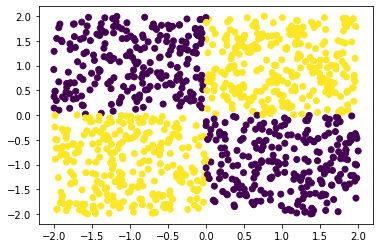

In [5]:
# Code for (C) here

np.random.seed(12345)

Xs = np.random.uniform(low=-2.0, high=2.0, size=1000).reshape((1000, 1))
Ys = np.random.uniform(low=-2.0, high=2.0, size=1000).reshape((1000, 1))
Zs = np.logical_xor(Xs<0, Ys>0).reshape((1000, 1))

plt.scatter(Xs, Ys, c=Zs)
plt.show()

In [6]:
def gradient_descent(x, y, starting_params, iterations, lr):
    params = starting_params
    W, b, v, c = params
    losses = []

    for i in range(iterations):
        grad = grad_f(params, x, y)  #compute gradients
        dL_dW, dL_db, dL_dv, dL_dc = grad

        #print the shape of parameters
        # print(f"W shape: {W.shape}")
        b = b.reshape(-1, 1)
        # print(f"b shape: {b.shape}")
        # print(f"v shape: {v.shape}")

        # print(f"dL_dW shape: {dL_dW.shape}")
        # print(f"dL_db shape: {dL_db.shape}")
        # print(f"dL_dv shape: {dL_dv.shape}")

        #update each parameter
        
        W -= lr * dL_dW
        b -= lr * dL_db
        v -= lr * dL_dv
        c -= lr * dL_dc
        

        params = [W, b, v, c]

        y_hat = yhat(x, params)  #compute y_hat
        current_loss = np.mean(loss(y, y_hat))  #compute loss
        losses.append(current_loss)

        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {current_loss}")

    return params, losses



W is [[0.11696983 0.95671784 0.25047601]
 [0.88723652 0.36674972 0.32622174]]
b is [0.44137647 0.83025508 0.11310214]
v is [[0.5330262 ]
 [0.36301223]
 [0.43799682]]
c is 0.11944067971751295
Iteration 0, Loss: 0.8823739154935587
Iteration 100, Loss: 0.8359882555338171
Iteration 200, Loss: 0.8048297371720133
Iteration 300, Loss: 0.7827004705255662
Iteration 400, Loss: 0.7664496639467322
Iteration 500, Loss: 0.7542321867757888
Iteration 600, Loss: 0.7448912503629246
Iteration 700, Loss: 0.7376708050045956
Iteration 800, Loss: 0.7320473483575173
Iteration 900, Loss: 0.7276349143061315
Iteration 1000, Loss: 0.7241668203535876
Iteration 1100, Loss: 0.7214416910938427
Iteration 1200, Loss: 0.7193066019809522
Iteration 1300, Loss: 0.7176344888275186
Iteration 1400, Loss: 0.7163364142991293
Iteration 1500, Loss: 0.71533972895669
Iteration 1600, Loss: 0.7145952232077822
Iteration 1700, Loss: 0.7140598377218588
Iteration 1800, Loss: 0.7136989286819986
Iteration 1900, Loss: 0.7134851572775435
Ite

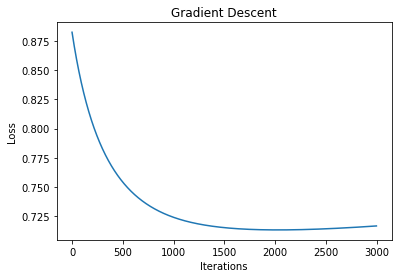

In [39]:
# Code for (B) here

np.random.seed(123456)

W_init = np.random.rand(2,3)-0.01
b_init = np.random.rand(3)-0.01
v_init = np.random.rand(3,1)-0.01
c_init = np.random.rand()-0.01

params_init = [W_init, b_init, v_init, c_init]

print(f"W is {W_init}\nb is {b_init}\nv is {v_init}\nc is {c_init}")

xs = np.random.uniform(low=-2, high=2, size=1000).reshape((500,2))
ys = np.zeros(500)
ys[np.logical_and(xs[:,0]>0, xs[:,1]>0)]=1
ys[np.logical_and(xs[:,0]<0, xs[:,1]<0)]=1

xs = np.asmatrix(xs)
ys = np.asmatrix(ys).reshape((500,1))

trajectories_standard, losses_standard = gradient_descent(xs, ys, params_init,
                                        iterations=3000, lr=1e-6)
plt.plot(losses_standard)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Gradient Descent")
plt.show()

I've been noticing that after a while the loss goes up depending on the learning rate. Everything is tuned right now to work, but early stopping would be a good idea. I think its out of the scope of this lab though.

In [26]:
# Your code for (E) here

def gradient_descent_momentum(x, y, starting_params, iterations, lr, alpha):
    params = starting_params
    W, b, v, c = params

    #initialize velocity terms for momentum
    vW = np.zeros_like(W)
    vb = np.zeros_like(b)
    vb = vb.reshape(-1, 1)
    vv = np.zeros_like(v)
    vc = 0

    losses = []

    for i in range(iterations):
        grad = grad_f(params, x, y)  #compute gradients
        dL_dW, dL_db, dL_dv, dL_dc = grad
        
        #apply momentum
        vW = alpha * vW + lr * dL_dW
        vb = alpha * vb + lr * dL_db
        vv = alpha * vv + lr * dL_dv
        vc = alpha * vc + lr * dL_dc

        #update parameters with momentum term
        W -= vW
        b = b.reshape(-1, 1)
        b -= vb
        v -= vv
        c -= vc

        params = [W, b, v, c]

        y_hat = yhat(x, params)  #compute y_hat
        current_loss = np.mean(loss(y, y_hat))  #compute loss
        losses.append(current_loss)

        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {current_loss}")

    return params, losses


Iteration 0, Loss: 1.0492909457989654
Iteration 100, Loss: 0.9623888048354702
Iteration 200, Loss: 0.9074323456685444
Iteration 300, Loss: 0.8693160000304374
Iteration 400, Loss: 0.8410611911329896
Iteration 500, Loss: 0.8192944224565081
Iteration 600, Loss: 0.8020909730420819
Iteration 700, Loss: 0.788259118640747
Iteration 800, Loss: 0.7770296934608708
Iteration 900, Loss: 0.7678452565320649
Iteration 1000, Loss: 0.7602846370570184
Iteration 1100, Loss: 0.7540182482606317
Iteration 1200, Loss: 0.7488267053965058
Iteration 1300, Loss: 0.7445248390647761
Iteration 1400, Loss: 0.7409492300559147
Iteration 1500, Loss: 0.7379896011699395
Iteration 1600, Loss: 0.7355597694765361
Iteration 1700, Loss: 0.7335631067864868
Iteration 1800, Loss: 0.7319385135692003
Iteration 1900, Loss: 0.7306403622094513
Iteration 2000, Loss: 0.7296197897333375
Iteration 2100, Loss: 0.7288433645717849
Iteration 2200, Loss: 0.7282803719239268
Iteration 2300, Loss: 0.7279076816071194
Iteration 2400, Loss: 0.72769

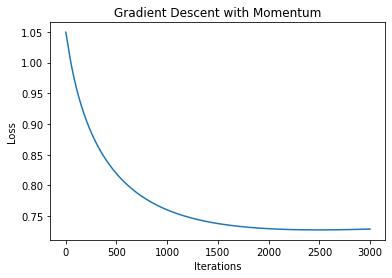

In [33]:
np.random.seed(42)

W_init = np.random.rand(2,3)-0.01
b_init = np.random.rand(3)-0.01
v_init = np.random.rand(3,1)-0.01
c_init = np.random.rand()-0.01

params_init = [W_init, b_init, v_init, c_init]

xs = np.random.uniform(low=-2, high=2, size=1000).reshape((500,2))
ys = np.zeros(500)
ys[np.logical_and(xs[:,0]>0, xs[:,1]>0)]=1
ys[np.logical_and(xs[:,0]<0, xs[:,1]<0)]=1

xs = np.asmatrix(xs)
ys = np.asmatrix(ys).reshape((500,1))

trajectories_momentum, losses_momentum = gradient_descent_momentum(xs, ys, params_init, iterations=3000, lr=1e-7, alpha=0.8)

plt.plot(losses_momentum)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Gradient Descent with Momentum")
plt.show()

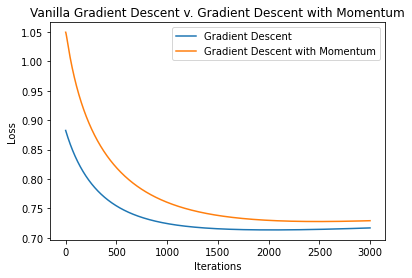

In [34]:
plt.plot(losses_standard, label="Gradient Descent")
plt.plot(losses_momentum, label="Gradient Descent with Momentum")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Vanilla Gradient Descent v. Gradient Descent with Momentum")
plt.legend()
plt.show()

In [35]:
print(trajectories_momentum)

[array([[0.51096725, 0.98224869, 0.60673271],
       [0.52583165, 0.05172039, 0.4117578 ]]), array([[-0.10427431],
       [ 0.98850871],
       [ 0.1688216 ]]), array([[ 0.74420643],
       [-0.55427081],
       [ 0.77120352]]), 0.3881160262615879]


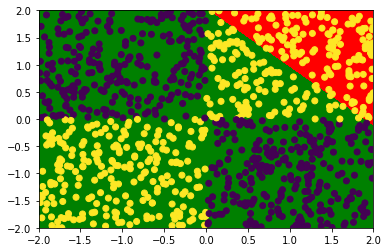

In [36]:
# Your code for (F) here

from matplotlib import colors

Xs = np.random.uniform(low=-2.0, high=2.0, size=1000).reshape((1000,1))
Ys = np.random.uniform(low=-2.0, high=2.0, size=1000).reshape((1000,1))
Zs = np.logical_xor(Xs<0, Ys>0).reshape((1000,1))

XOR = np.concatenate((Xs, Ys, Zs), axis=1)

x = np.linspace(-2, 2, 250).reshape(250,1)
y = np.linspace(-2, 2, 250).reshape(250,1)
Z = np.zeros(250*250).reshape(250,250)


W_final, b_final, v_final, c_final = trajectories_standard


def ff_nn_relu(X, W, b, v, c):
    """Computes yhat given input data and model specification"""
    z = np.dot(X, W) + b.reshape(1, -1) # Linear step
    a = relu(z) # Activation step
    y_hat = sig(np.dot(a, v) + c) # Output step
    return y_hat

# Given the XOR dataset, compute the decision boundary learned by the network
for countx, i in enumerate(x):
    for county, j in enumerate(y):
        temp = np.array([i[0],j[0]])
        Z[countx][county] = ff_nn_relu(temp, W_final, b_final, v_final, c_final) # Your code here


X, Y = np.meshgrid(x, y)

cmap = colors.ListedColormap(['green', 'red'])
plt.contourf(X, Y, Z, cmap=cmap)
plt.scatter(Xs, Ys, c=Zs)
plt.show()

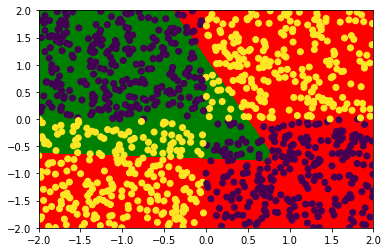

In [37]:
# Your code for (F) here

from matplotlib import colors

Xs = np.random.uniform(low=-2.0, high=2.0, size=1000).reshape((1000,1))
Ys = np.random.uniform(low=-2.0, high=2.0, size=1000).reshape((1000,1))
Zs = np.logical_xor(Xs<0, Ys>0).reshape((1000,1))

XOR = np.concatenate((Xs, Ys, Zs), axis=1)

x = np.linspace(-2, 2, 250).reshape(250,1)
y = np.linspace(-2, 2, 250).reshape(250,1)
Z = np.zeros(250*250).reshape(250,250)


W_final, b_final, v_final, c_final = trajectories_momentum


def ff_nn_relu(X, W, b, v, c):
    """Computes yhat given input data and model specification"""
    z = np.dot(X, W) + b.reshape(1, -1) # Linear step
    a = relu(z) # Activation step
    y_hat = sig(np.dot(a, v) + c) # Output step
    return y_hat

# Given the XOR dataset, compute the decision boundary learned by the network
for countx, i in enumerate(x):
    for county, j in enumerate(y):
        temp = np.array([i[0],j[0]])
        Z[countx][county] = ff_nn_relu(temp, W_final, b_final, v_final, c_final) # Your code here


X, Y = np.meshgrid(x, y)

cmap = colors.ListedColormap(['green', 'red'])
plt.contourf(X, Y, Z, cmap=cmap)
plt.scatter(Xs, Ys, c=Zs)
plt.show()

**Problem-2** One of the challenges in training neural models is when inputs are not on the same scales. Why is this problematic? Consider the expression for the derivative of the loss with respect to a weight for a particular layer.

**YOUR ANSWER HERE**:

If inputs arent on the same scale then a gradients wont be the on the same scale either. This could make the learning process unstable as well as maybe being stuck in a local minimum. Additionally, the scale variance could negatively impact how quickly it converges if it is able to converge at all. Lastly, I could see this causing the model to 